In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
url='https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/'
response=requests.get(url)
print(response)

<Response [200]>


In [4]:
world_meter=BeautifulSoup(response.content,'html.parser')
print(world_meter)


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>How many countries are there in the world? (2024) - Total &amp; List | Worldometer</title><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/favicon/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/><link href="/favicon/apple-icon-120x120.png" rel="apple-touch-ico

In [5]:
world_meter.select('td')[0].text

'1'

In [6]:
r1=world_meter.find('td')
print(r1)

<td>1</td>


In [7]:
data_i=world_meter.find_all('td')
print(data_i)
print(len(data_i))

[<td>1</td>, <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/india-population/">India</a></td>, <td style="font-weight: bold;">1,428,627,663</td>, <td>17.76 %</td>, <td>2,973,190</td>, <td>2</td>, <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/china-population/">China</a></td>, <td style="font-weight: bold;">1,425,671,352</td>, <td>17.72 %</td>, <td>9,388,211</td>, <td>3</td>, <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/us-population/">United States</a></td>, <td style="font-weight: bold;">339,996,563</td>, <td>4.23 %</td>, <td>9,147,420</td>, <td>4</td>, <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/indonesia-population/">Indonesia</a></td>, <td style="font-weight: bold;">277,534,122</td>, <td>3.45 %</td>, <td>1,811,570</td>, <td>5</td>, <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/wor

In [8]:
srno=[]
country=[]
population=[]
world_share=[]
land_area=[]

In [9]:
for i in range(0,len(data_i),5):
    srno.append(world_meter.select('td')[i].text)
    country.append(world_meter.select('td')[i+1].text)
    population.append(world_meter.select('td')[i+2].text)
    world_share.append(world_meter.select('td')[i+3].text)
    land_area.append(world_meter.select('td')[i+4].text)

In [38]:
pop1=[i.replace(',','') for i in population]
ws1=[i.replace('%','') for i in world_share]
land1=[i.replace(',','') for i in land_area]

In [34]:
f=int(population[0])


ValueError: invalid literal for int() with base 10: '1,428,627,663'

In [27]:
list(map(float,population))
population

ValueError: could not convert string to float: '1,428,627,663'

In [39]:
worldmeter=pd.DataFrame({'SR.NO':srno,'Country':country,'Population(2023)':pop1,'World_share(%)':ws1,'land_area':land1})
worldmeter.head(20)

,SR.NO,Country,Population(2023),World_share(%),land_area
0,1,India,1428627663,17.76,2973190
1,2,China,1425671352,17.72,9388211
2,3,United States,339996563,4.23,9147420
3,4,Indonesia,277534122,3.45,1811570
4,5,Pakistan,240485658,2.99,770880
5,6,Nigeria,223804632,2.78,910770
6,7,Brazil,216422446,2.69,8358140
7,8,Bangladesh,172954319,2.15,130170
8,9,Russia,144444359,1.8,16376870
9,10,Mexico,128455567,1.6,1943950


In [41]:
worldmeter.dtypes

SR.NO               object
Country             object
Population(2023)    object
World_share(%)      object
land_area           object
dtype: object

In [42]:
worldmeter['SR.NO']=worldmeter['SR.NO'].astype('int')
worldmeter['Population(2023)']=worldmeter['Population(2023)'].astype('int')
worldmeter['World_share(%)']=worldmeter['World_share(%)'].astype('float')
worldmeter['land_area']=worldmeter['land_area'].astype('int')

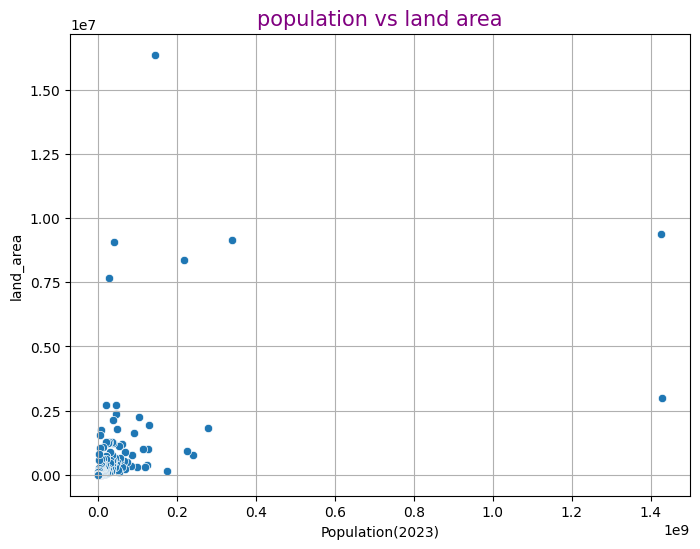

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=worldmeter,x='Population(2023)',y='land_area',palette='set1')
plt.title('population vs land area',fontsize=15,color='purple')
plt.grid()
plt.show()

In [44]:
df_top5=worldmeter.nlargest(n=5,columns='Population(2023)')
df_top5

,SR.NO,Country,Population(2023),World_share(%),land_area
0,1,India,1428627663,17.76,2973190
1,2,China,1425671352,17.72,9388211
2,3,United States,339996563,4.23,9147420
3,4,Indonesia,277534122,3.45,1811570
4,5,Pakistan,240485658,2.99,770880


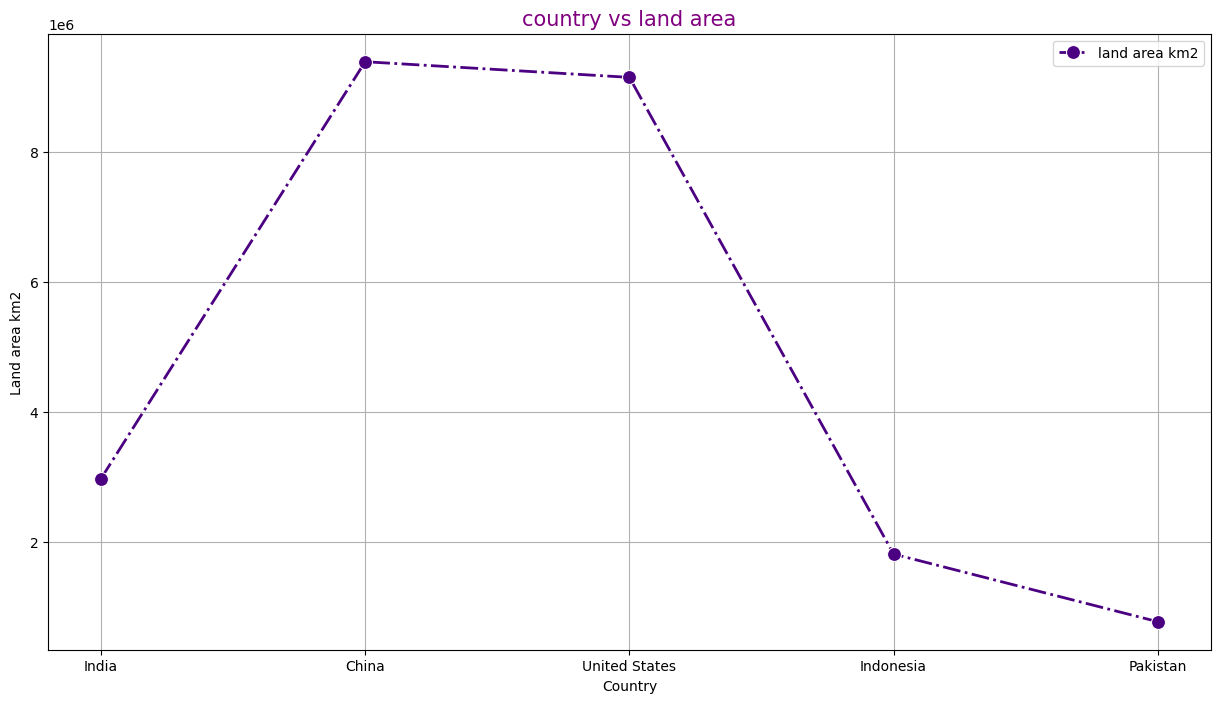

In [53]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_top5,x='Country',y='land_area',color='indigo',marker='o',lw=2,linestyle='-.',markersize=10,label='land area km2')
plt.ylabel('Land area km2')
plt.xlabel('Country')
plt.title('country vs land area',fontsize=15,color='purple')
plt.grid()
#plt.legend()
plt.show()